In [1]:
from datetime import date, timedelta
import requests
from requests_ntlm import HttpNtlmAuth
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline  

Download newest data from ECDC website. This uses the current date from your computer.

In [2]:
today = date.today() - timedelta(days=1)
ecdcUrl = ('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx' %today)
fname = 'ecdc.xlsx'

r = requests.get(ecdcUrl, auth=HttpNtlmAuth(':',':'))

with open(fname, 'wb') as f:
    f.write(r.content)

In [3]:
totalData = pd.read_excel(fname)
totalData.tail()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
21124,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
21125,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
21126,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
21127,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
21128,2020-03-21,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


Select countries to compare. Command or ctrl select different countries.

In [4]:
countries = totalData['countriesAndTerritories'].unique()
countrySelector = widgets.SelectMultiple(
    options=countries,
    value=['Brazil', 'Germany', 'India', 'Italy', 'Sweden', 'United_States_of_America'],
    description='',
    rows=15,
)
countrySelector

SelectMultiple(index=(27, 75, 92, 99, 183, 200), options=('Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Ang…

In [5]:
analyzedCountries = countrySelector.value
print(analyzedCountries)
df = totalData[totalData['countriesAndTerritories'].isin(analyzedCountries)]
dfNewCases = pd.pivot_table(df, index='dateRep', columns = 'countriesAndTerritories', values='cases').reset_index()
dfDeaths = pd.pivot_table(df, index='dateRep', columns = 'countriesAndTerritories', values='deaths').reset_index()

dfNewCases.tail()

('Brazil', 'Germany', 'India', 'Italy', 'Sweden', 'United_States_of_America')


countriesAndTerritories,dateRep,Brazil,Germany,India,Italy,Sweden,United_States_of_America
151,2020-05-30,26928.0,738.0,7964.0,516.0,749.0,25337.0
152,2020-05-31,33274.0,286.0,8380.0,416.0,637.0,23297.0
153,2020-06-01,16409.0,333.0,8392.0,355.0,429.0,19807.0
154,2020-06-02,11598.0,213.0,8171.0,178.0,272.0,21086.0
155,2020-06-03,28936.0,342.0,8909.0,318.0,775.0,20544.0


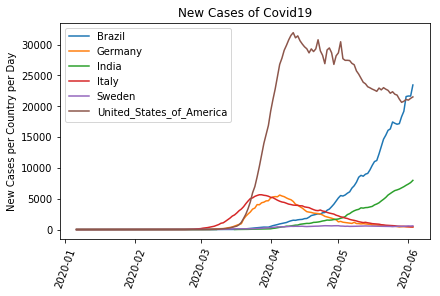

In [6]:
fig, ax = plt.subplots(constrained_layout=True)

for country in analyzedCountries:
    a = ax.plot(dfNewCases.dateRep, dfNewCases[country].rolling(7).mean(), '-')
    
ax.set_ylabel('New Cases per Country per Day')
ax.set_title('New Cases of Covid19')
ax.legend()
plt.xticks(rotation=70)
plt.show()

In [7]:
sum(dfNewCases.United_States_of_America)

1831821.0

In [8]:
for country in analyzedCountries:
    colName = 'totalCases' + country
    dfNewCases[colName] = dfNewCases[country].cumsum() #use the cumulative sum to add all new cases up to now and calculate total cases

dfNewCases.tail()

countriesAndTerritories,dateRep,Brazil,Germany,India,Italy,Sweden,United_States_of_America,totalCasesBrazil,totalCasesGermany,totalCasesIndia,totalCasesItaly,totalCasesSweden,totalCasesUnited_States_of_America
151,2020-05-30,26928.0,738.0,7964.0,516.0,749.0,25337.0,465166.0,181196.0,173763.0,232248.0,36476.0,1747087.0
152,2020-05-31,33274.0,286.0,8380.0,416.0,637.0,23297.0,498440.0,181482.0,182143.0,232664.0,37113.0,1770384.0
153,2020-06-01,16409.0,333.0,8392.0,355.0,429.0,19807.0,514849.0,181815.0,190535.0,233019.0,37542.0,1790191.0
154,2020-06-02,11598.0,213.0,8171.0,178.0,272.0,21086.0,526447.0,182028.0,198706.0,233197.0,37814.0,1811277.0
155,2020-06-03,28936.0,342.0,8909.0,318.0,775.0,20544.0,555383.0,182370.0,207615.0,233515.0,38589.0,1831821.0


Brazil passed 1000 cases on 2020-03-22 00:00:00
Germany passed 1000 cases on 2020-03-10 00:00:00
India passed 1000 cases on 2020-03-30 00:00:00
Italy passed 1000 cases on 2020-03-01 00:00:00
Sweden passed 1000 cases on 2020-03-16 00:00:00
United_States_of_America passed 1000 cases on 2020-03-11 00:00:00


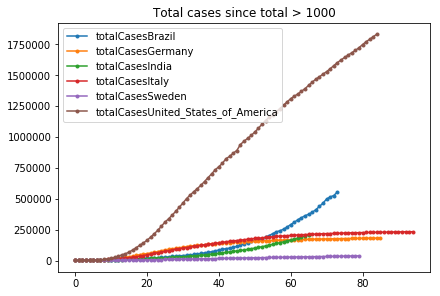

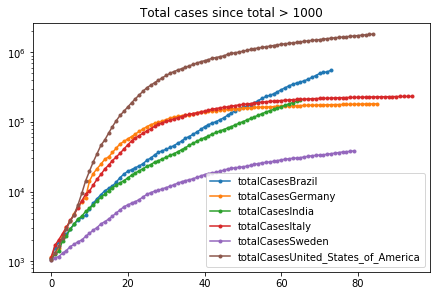

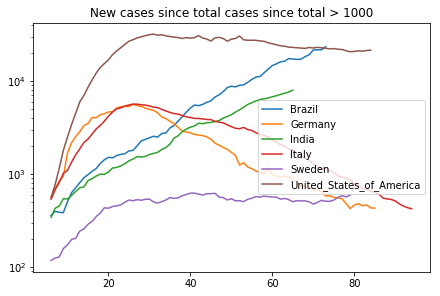

In [14]:
fig, ax = plt.subplots(constrained_layout=True)
fig2, ax2 = plt.subplots(constrained_layout=True)
fig3, ax3 = plt.subplots(constrained_layout=True)

for country in analyzedCountries:
    colNameTotalCases = 'totalCases' + country
    #dfOver1000AllCountries = dfNewCases.loc[dfNewCases[colNameTotalCases] >= 1000]
    dftemp = dfNewCases.loc[dfNewCases[colNameTotalCases] >= 1000].reset_index(drop=True)
    a = ax.plot(dftemp[colNameTotalCases], '.-')
    a2 = ax2.plot(dftemp[colNameTotalCases], '.-')
    a3 = ax3.plot(dftemp[country].rolling(7).mean(), '-')

    datePassed1000 = dftemp.iloc[0].dateRep
    print(country, 'passed 1000 cases on', datePassed1000)

ax.set_title('Total cases since total > 1000')
ax.legend()

ax2.set_yscale('log')
ax2.set_title('Total cases since total > 1000')
ax2.legend()

ax3.set_yscale('log')
ax3.set_title('New cases since total cases > 1000')
ax3.legend()